**BUILDING AN MLP FOR IMAGE CLASSIFICATION USING CIFAR10 DATASET**

**LOADING REQUIRED LIBRARIES**

In [0]:
import keras as k 
from keras.datasets import cifar10
from matplotlib import pyplot as p
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Dropout, Activation,Flatten,BatchNormalization
from keras_sequential_ascii import sequential_model_to_ascii_printout
from sklearn.metrics import classification_report, confusion_matrix
import datetime

In [0]:
!pip install keras_sequential_ascii

**LOAD DATA**

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

**HYPERPARAMETERS SETTINGS**

In [0]:
no_class = 10 
batch_size = 64
epoch = 20
learning_rate = 0.0001


**DATA PREPROCESSING**

In [0]:

y_train = k.utils.to_categorical(y_train, no_class)
y_test = k.utils.to_categorical(y_test, no_class)

# pixel values range from 0 to 255 - normalize 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255


**MODEL CREATION**

In [0]:
def model_creation():
  model = Sequential()
  model.add(Flatten(input_shape=x_train.shape[1:]))
  model.add(Dense(2048,activation= 'relu'))
  model.add(Dropout(.2))
  model.add(Dense(1024, activation='relu'))
  model.add(Dense(512,activation='relu'))
  model.add(Dense(no_class))
  model.add(Activation('softmax'))
  opt = optimizers.Adam(beta_1=.9,beta_2=.999,lr = learning_rate)
  model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
  return model

In [0]:

cnn_basemodel = model_creation() 
  

**MODEL FIT AND EVALUATION**

In [0]:
start_time = datetime.datetime.now()
cnn_1 = cnn_basemodel.fit(x_train, y_train, batch_size=batch_size, epochs=epoch,validation_data=(x_test,y_test),shuffle=True)
acc = cnn_basemodel.evaluate(x_test, y_test, verbose=1)
end_time = datetime.datetime.now()

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 18s 351us/step - loss: 1.8348 - acc: 0.3359 - val_loss: 1.6863 - val_acc: 0.3950
Epoch 2/20
50000/50000 [==============================] - 14s 284us/step - loss: 1.6532 - acc: 0.4105 - val_loss: 1.5955 - val_acc: 0.4282
Epoch 3/20
50000/50000 [==============================] - 14s 289us/step - loss: 1.5705 - acc: 0.4398 - val_loss: 1.5257 - val_acc: 0.4566
Epoch 4/20
50000/50000 [==============================] - 15s 308us/step - loss: 1.5159 - acc: 0.4590 - val_loss: 1.4934 - val_acc: 0.4642
Epoch 5/20
50000/50000 [==============================] - 15s 308us/step - loss: 1.4708 - acc: 0.4762 - val_loss: 1.4312 - val_acc: 0.4904
Epoch 6/20
50000/50000 [==============================] - 15s 308us/step - loss: 1.4275 - acc: 0.4916 - val_loss: 1.4178 - val_acc: 0.4915
Epoch 7/20
50000/50000 [==============================] - 15s 308us/step - loss: 1.3933 - acc: 0.5012 - val_loss: 1.

**CALCULATING MODEL TRAINING AND VALIDATION TIME**

In [0]:
start_time = start_time.minute
end_time = end_time.minute
train_v_time = end_time - start_time
print(train_v_time)

5


**MODEL METRICS VISUALIZATION:**


*   Model Accuracy

*   Model Loss



In [0]:
def plot_modelacc(fit_model):
    with p.style.context('ggplot'):
            p.plot(fit_model.history['acc'])
            p.plot(fit_model.history['val_acc'])
            p.title("MODEL ACCURACY")
            p.xlabel("# of EPOCHS")
            p.ylabel("ACCURACY")
            p.legend(['train', 'test'], loc='upper left')
    return p.show()

In [0]:
def plot_model_loss(fit_model):
    with p.style.context('ggplot'):
            p.plot(fit_model.history['loss'])
            p.plot(fit_model.history['val_loss'])
            p.title("MODEL LOSS")
            p.xlabel("# of EPOCHS")
            p.ylabel("LOSS")
            p.legend(['train', 'test'], loc='upper left')
    return p.show()


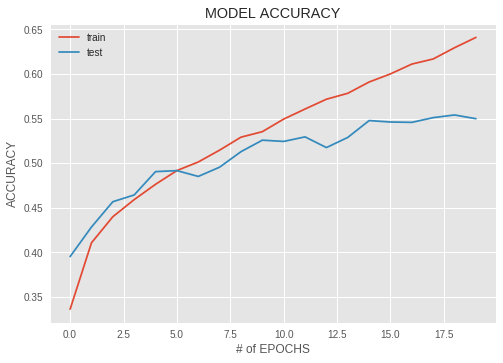

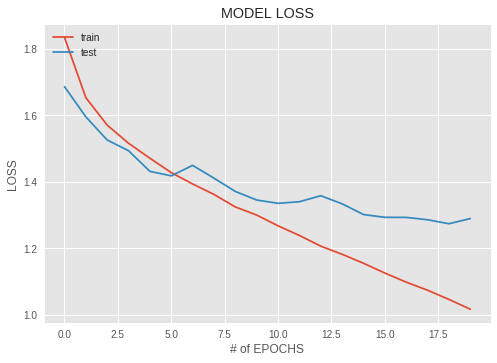

In [0]:
plot_modelacc(cnn_1)
plot_model_loss(cnn_1)

In [0]:
print('Test data loss:', acc[0] )
print('Test data accuracy:', acc[1] * 100)

Test data loss: 1.289082939338684
Test data accuracy: 54.98


**FINAL RESULTS:**


*   Model Accuracy on Test Data: 54.98%
*   Model Loss on Test Data: 1.28
*   Model Training  and evaluation time: 5 mins




